# Load packages

In [4]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from kt_utils import *

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

In [5]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


# Building Model in Keras

In [57]:

def HappyModel(input_shape):
    """
    Implementation of the HappyModel.
    
    Arguments:
    input_shape -- shape of the images of the dataset
        (height, width, channels) as a tuple.  
        Note that this does not include the 'batch' as a dimension.
        If you have a batch like 'X_train', 
        then you can provide the input_shape using
        X_train.shape[1:]
    """
    """
    Returns:
    model -- a Model() instance in Keras
    """
    
    # Define the input placeholder as a tensor with shape input_shape. Think of this as your input image!
    X_input = Input(input_shape)

    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((3, 3))(X_input)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)

    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool0')(X)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (3, 3), strides = (1, 1), name = 'conv1')(X)
    X = BatchNormalization(axis = 3, name = 'bn1')(X)
    X = Activation('relu')(X)

    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool1')(X)

    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='HappyModel')

    ### END CODE HERE ###
    
    return model

# Model Init

In [58]:
happyModel = HappyModel(X_train.shape[1:])

# Model Summary

In [60]:
happyModel.compile("adam","binary_crossentropy",metrics=["accuracy"])

# Model Training

In [59]:
happyModel.summary()

Model: "HappyModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 64, 64, 3)]       0         
_________________________________________________________________
zero_padding2d_9 (ZeroPaddin (None, 70, 70, 3)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 64, 64, 32)        4736      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 64, 64, 32)        128       
_________________________________________________________________
activation_13 (Activation)   (None, 64, 64, 32)        0         
_________________________________________________________________
max_pool0 (MaxPooling2D)     (None, 32, 32, 32)        0         
_________________________________________________________________
conv1 (Conv2D)               (None, 30, 30, 32)        9

# Model Compile

In [61]:
happyModel.fit(x = X_train, y = Y_train, epochs = 40, batch_size = 16)

Epoch 1/40
38/38 [==============================] - 0s 9ms/step - loss: 0.5700 - accuracy: 0.7183
Epoch 2/40
38/38 [==============================] - 0s 9ms/step - loss: 0.2098 - accuracy: 0.9117
Epoch 3/40
38/38 [==============================] - 0s 9ms/step - loss: 0.1948 - accuracy: 0.9233
Epoch 4/40
38/38 [==============================] - 0s 9ms/step - loss: 0.1215 - accuracy: 0.9650
Epoch 5/40
38/38 [==============================] - 0s 9ms/step - loss: 0.0814 - accuracy: 0.9783
Epoch 6/40
38/38 [==============================] - 0s 9ms/step - loss: 0.0686 - accuracy: 0.9800
Epoch 7/40
38/38 [==============================] - 0s 9ms/step - loss: 0.0707 - accuracy: 0.9783
Epoch 8/40
38/38 [==============================] - 0s 9ms/step - loss: 0.0815 - accuracy: 0.9683
Epoch 9/40
38/38 [==============================] - 0s 9ms/step - loss: 0.0706 - accuracy: 0.9833
Epoch 10/40
38/38 [==============================] - 0s 9ms/step - loss: 0.0801 - accuracy: 0.9783
Epoch 11/40
38/38 [

# Model Evaluation

In [62]:
preds = happyModel.evaluate(x = X_test, y = Y_test)
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

5/5 [==============================] - 0s 6ms/step - loss: 0.1051 - accuracy: 0.9667

Loss = 0.10506440699100494
Test Accuracy = 0.9666666388511658


# Model Test with sample Image

[[0.]]


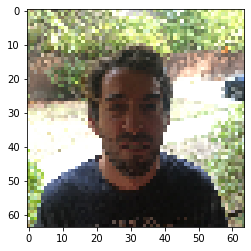

In [70]:
img_path = 'sad.jpg'

img = image.load_img(img_path, target_size=(64, 64))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print(happyModel.predict(x))